# Respostas
1. No dataset human_freedom, existem alguns valores faltantes. Antes de começar a manipular os dados, trate essas informações e descreva sucintamente as alterações feitas;
   Primeiramente foi analisada a quantidade de dados faltantes utilizando a função ```ctrs.info()``` da biblioteca pandas, e após executar essa etapa foi notado que seis linhas não apresentavam dados sobre o clima, uma linha não apresentava dados sobre a natalidade e apenas uma linha não apresentava dados sobre a mortalidade. Observando os objetivos a serem alcançados a frente foi percebido que não será requisitado dados sobre o clima, sendo esta a coluna com mais dados faltantes, portanto a forma escolhida para lidar com essa correção é simplesmente apagar a coluna "climate" utilizando o seguinte código: ```ctrs.drop("Climate",axis=1,inplace=True)```. Já nos casos de birthrate e deathrate, foram utilizados os dados de média e meidana para ter uma melhor noção dos dados então com a similaridades destes decidiu-se substituir os valores faltantes pela mediana em ambos os casos utilizando a função ```ctrs['columnID']=ctrs['columnID'].fillna(ctrs['columnID'].median())```.
2. Calcule o número total de medalhas recebido por cada país e adicione essa coluna no dataset;
   Para criar uma nova coluna com a soma das colunas já existente foi utilizada simplesmente a seguinte linha de comando: ```medOl["Total medals"] = medOl["Gold Medal"] + medOl["Silver Medal"] + medOl["Bronze Medal"]```
3. Seguindo as regras oficiais das Olimpíadas, obtenha o ranking dos países. Visualize, também, os dez melhores países com base no total de medalhas;
   Sabendo que a classificação dos países de acordo com as regras das olimpiadas se dão pela quantidade de medalhas de ouro e os crítérios de desempate sendo a quantidade de Pratas e Bronzes respectivamente foi utilizada a função ```sort_values``` do pandas para ordenar os países da lista de forma correta. O comando utilizado foi ```medOl.sort_values(["Gold Medal", "Silver Medal", "Bronze Medal"], ascending = False)``` classificando primeiramente com base nas medalhas de ouro e após isso com base nas medalhas de prata e bronze. Para exibir apenas os 10 melhores foi utilizado o comando ```medOl.head(10)```
4. Obtenha a média de alfabetização por região e a represente graficamente;
   Para isso, foi criado um novo datafram contendo apenas os dados necessários e então os dados foram agrupados por região e a media foi tirada utilizando o seguinte código ```literacyByRegion = literacyByRegion.groupby(['Region']).mean().sort_values("Literacy (%)", ascending=False)``` Note que o dataframe foi ordenado com base no nível de alfabetização para facilitar a visualização no gráfico. Por sua vez, para gerar a visualização dos dados utilizou-se o seguinte código ```sns.barplot(x = literacyByRegion['Literacy (%)'], y = literacyByRegion['Region'], palette='rocket')``` indicando os eixos x e y como sendo o nivel de alfabetização e as regiões respectivamente. Também foi utilizada a peleta de cores "Rocket" para dar uma melhor indicação da diferença entre os dados
5. Liste os cinco países com maior número de celulares a cada mil habitantes. Faça uma representação gráfica;
   Para isso utilizamos o seguinte código para organizar os países pela quantidade de celulares ppor mil habitantes: ```ctrs = ctrs.sort_values('Phones (per 1000)', ascending = False)``` e para mostrar apenas os 5 primeiros utilizamos o seguinte comando: ```ctrs.head(5)```
6. Obtenha os dados do dataset human_freedom apenas para o ano de 2018;
   Utiliza-se o seguinte código ```hmFrd2018 = hmFrd[hmFrd['year'] == 2018.0]``` para criar um novo dataframe com base em uma seleção no datafram original
7. Mostre a evolução do hf_score (human freedom score) do Brasil em função do tempo;
   Foi utilizado o seguinte código para gerar o gráfico```sns.relplot( data=hmFrd[hmFrd['countries'] == 'brazil'], kind='line', x='year', y='hf_score')``` nele indicamos os dados como sendo uma seleção das linhas cujo país é o Brasil e indicamos os eixos x e y como sendo respectivamente o tempo em anos e a pontuação "hf_core"
8. Mostre qual é a região com a maior média populacional;
   De forma análoga a  como foi calculada a alfabetização por região, primeiramente copia-se os dados de população e região para um novo dataset com o seguinte código ```populationByRegion = ctrs[['Region', 'Population']].copy()``` e então agrupam-se as linhas por região e tira-se a média.
9.  Com base na análise dos dados, é possível afirmar que países com maior população tendem a ter mais pessoas saindo ou entrando no país (maior fluxo migratório)?
    Utilizando o gráfico plotado a partir do seguinte código, ```sns.relplot(data=ctrs,x = 'Net migration', y = 'Population', hue = 'Country```, não se observou nenhuma relação entre o tamanho da população e o fluxo migratório.
10. Caso o número de medalhas de bronze e de ouro fossem trocadas, qual seria o ranking dos países?
    
11. Normalize os valores dos datasets;
    
12. É possível observar correlação entre os índices de natalidade e de mortalidade? Justifique o resultado encontrado;
    
13. É possível observar correlação entre a generosidade da população e o índice de agricultura dos países? Justifique o resultado encontrado;
    
14. Monte grupos de forma similar a é feito na Copa do Mundo, isto é, um forte, dois intermediários e um fraco (deixe claro o parâmetro utilizado para definir as categorias);
    
15. Qual país apresentou maior aumento na taxa de homicídios ao longo do tempo?
    
16. Qual foi o impacto das eleições americanas de 2016 no ranking de liberdade do país? Explique;
    
17. É possível observar correlação forte entre a população de um país e a colocação dele nas Olimpíadas? Justifique;
    
18. Em quais características o Brasil precisa investir para melhorar sua colocação no ranking olímpico? Encontre a característica mais importante entre todos os datasets;
    
19. Suponha que a economia do país dependa apenas de agricultura e indústria. O fato de um país ser litorâneo faz com que ele aposte mais na agricultura do que na indústria? Explique;
    
20. Obtenha o ranking das regiões com maior número médio de medalhas.

# Gráficos

# Código

Ao longo do código serão utilizadas abreviações para os datasets, sendo elas atribuídas da seguinte forma:
 - ctrs : countries
 - hpns : hapiness_report
 - hmFrd : human_freedom
 - medOl : medals_olympics

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importação dos dados dos países
ctrs = pd.read_excel('countries.xlsx', sheet_name = 'Sheet1')

In [113]:
ctrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             47 non-null     object 
 1   Region                              47 non-null     object 
 2   Population                          47 non-null     float64
 3   Area (sq. mi.)                      47 non-null     float64
 4   Pop. Density (per sq. mi.)          47 non-null     float64
 5   Coastline (coast/area ratio)        47 non-null     float64
 6   Net migration                       47 non-null     float64
 7   Infant mortality (per 1000 births)  47 non-null     float64
 8   GDP ($ per capita)                  47 non-null     float64
 9   Literacy (%)                        47 non-null     float64
 10  Phones (per 1000)                   47 non-null     float64
 11  Arable (%)                          47 non-null

In [114]:
ctrs.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,41.000000,46.000000,46.000000,47.000000,47.000000,47.000000
mean,9.421325e+07,1.678980e+06,132.287234,2.447021,0.987660,17.79766,16472.340426,93.508511,358.436170,21.723404,2.823617,75.453404,2.597561,14.768261,9.661522,0.074447,0.316426,0.609255
std,2.458600e+08,3.600805e+06,127.326065,3.920429,3.444896,20.48499,11623.714555,11.037778,213.787109,15.027131,3.680558,15.587760,0.726460,8.400564,3.370680,0.087977,0.105410,0.119164
min,8.853590e+05,1.099100e+04,2.600000,0.000000,-8.580000,2.77000,700.000000,42.700000,3.600000,1.640000,0.000000,42.180000,1.000000,8.250000,4.230000,0.002000,0.099000,0.197000
25%,7.858407e+06,7.457300e+04,53.700000,0.155000,-0.085000,4.68500,5200.000000,92.550000,211.100000,9.510000,0.595000,64.170000,2.000000,9.752500,7.515000,0.021000,0.258500,0.551000
50%,2.230355e+07,2.835600e+05,93.900000,0.460000,0.860000,7.03000,15700.000000,98.000000,336.300000,18.950000,1.120000,76.330000,3.000000,11.145000,9.560000,0.040000,0.303000,0.622000
75%,6.074264e+07,6.921400e+05,159.550000,2.685000,2.185000,22.85500,27650.000000,99.000000,481.550000,30.240000,3.255000,88.755000,3.000000,16.605000,10.612500,0.097000,0.345000,0.691500
max,1.313974e+09,1.707520e+07,640.300000,16.970000,16.290000,95.32000,37800.000000,100.000000,898.000000,56.210000,16.770000,98.090000,4.000000,47.350000,22.000000,0.475000,0.801000,0.787000


In [115]:
#Remção da coluna Climate
ctrs.drop("Climate",axis=1,inplace=True)
ctrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             47 non-null     object 
 1   Region                              47 non-null     object 
 2   Population                          47 non-null     float64
 3   Area (sq. mi.)                      47 non-null     float64
 4   Pop. Density (per sq. mi.)          47 non-null     float64
 5   Coastline (coast/area ratio)        47 non-null     float64
 6   Net migration                       47 non-null     float64
 7   Infant mortality (per 1000 births)  47 non-null     float64
 8   GDP ($ per capita)                  47 non-null     float64
 9   Literacy (%)                        47 non-null     float64
 10  Phones (per 1000)                   47 non-null     float64
 11  Arable (%)                          47 non-null

In [116]:
#preenchimento das linhas faltantes com o valor da mediana
ctrs['Birthrate']=ctrs['Birthrate'].fillna(ctrs['Birthrate'].median())
ctrs['Deathrate']=ctrs['Deathrate'].fillna(ctrs['Deathrate'].median())
ctrs.info()
ctrs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             47 non-null     object 
 1   Region                              47 non-null     object 
 2   Population                          47 non-null     float64
 3   Area (sq. mi.)                      47 non-null     float64
 4   Pop. Density (per sq. mi.)          47 non-null     float64
 5   Coastline (coast/area ratio)        47 non-null     float64
 6   Net migration                       47 non-null     float64
 7   Infant mortality (per 1000 births)  47 non-null     float64
 8   GDP ($ per capita)                  47 non-null     float64
 9   Literacy (%)                        47 non-null     float64
 10  Phones (per 1000)                   47 non-null     float64
 11  Arable (%)                          47 non-null

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
count,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,9.421325e+07,1.678980e+06,132.287234,2.447021,0.987660,17.79766,16472.340426,93.508511,358.436170,21.723404,2.823617,75.453404,14.691170,9.659362,0.074447,0.316426,0.609255
std,2.458600e+08,3.600805e+06,127.326065,3.920429,3.444896,20.48499,11623.714555,11.037778,213.787109,15.027131,3.680558,15.587760,8.325543,3.333874,0.087977,0.105410,0.119164
min,8.853590e+05,1.099100e+04,2.600000,0.000000,-8.580000,2.77000,700.000000,42.700000,3.600000,1.640000,0.000000,42.180000,8.250000,4.230000,0.002000,0.099000,0.197000
25%,7.858407e+06,7.457300e+04,53.700000,0.155000,-0.085000,4.68500,5200.000000,92.550000,211.100000,9.510000,0.595000,64.170000,9.785000,7.520000,0.021000,0.258500,0.551000
50%,2.230355e+07,2.835600e+05,93.900000,0.460000,0.860000,7.03000,15700.000000,98.000000,336.300000,18.950000,1.120000,76.330000,11.145000,9.560000,0.040000,0.303000,0.622000
75%,6.074264e+07,6.921400e+05,159.550000,2.685000,2.185000,22.85500,27650.000000,99.000000,481.550000,30.240000,3.255000,88.755000,16.590000,10.605000,0.097000,0.345000,0.691500
max,1.313974e+09,1.707520e+07,640.300000,16.970000,16.290000,95.32000,37800.000000,100.000000,898.000000,56.210000,16.770000,98.090000,47.350000,22.000000,0.475000,0.801000,0.787000


In [117]:
#Importação dos dados das medalhas olímpicas
medOl = pd.read_excel("medals_olympics.xlsx")
medOl.head()

,Country,Gold Medal,Silver Medal,Bronze Medal
0,unitedstates,39.0,41.0,33.0
1,china,38.0,32.0,18.0
2,japan,27.0,14.0,17.0
3,unitedkingdom,22.0,21.0,22.0
4,russia,20.0,28.0,23.0


In [118]:
#Criando coluna com o total de medalhas
medOl["Total medals"] = medOl["Gold Medal"] + medOl["Silver Medal"] + medOl["Bronze Medal"]
medOl.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total medals
0,unitedstates,39.0,41.0,33.0,113.0
1,china,38.0,32.0,18.0,88.0
2,japan,27.0,14.0,17.0,58.0
3,unitedkingdom,22.0,21.0,22.0,65.0
4,russia,20.0,28.0,23.0,71.0


In [119]:
#Ranking dos países de acordo com as regras das olimpíadas (exibindo os 10 primeiros)
medOl = medOl.sort_values(["Gold Medal", "Silver Medal", "Bronze Medal"], ascending = False)
medOl.head(10)


,Country,Gold Medal,Silver Medal,Bronze Medal,Total medals
0,unitedstates,39.0,41.0,33.0,113.0
1,china,38.0,32.0,18.0,88.0
2,japan,27.0,14.0,17.0,58.0
3,unitedkingdom,22.0,21.0,22.0,65.0
4,russia,20.0,28.0,23.0,71.0
5,australia,17.0,7.0,22.0,46.0
6,netherlands,10.0,12.0,14.0,36.0
7,france,10.0,12.0,11.0,33.0
8,germany,10.0,11.0,16.0,37.0
9,italy,10.0,10.0,20.0,40.0


In [120]:
#Alfabetização por região
#É criado um novo Data frame contendo apenas os dados necessários
literacyByRegion = ctrs[['Region', 'Literacy (%)']].copy()
#Utiliza-se o comando groupby para agrupar os dados por região
literacyByRegion = literacyByRegion.groupby(['Region']).mean().sort_values("Literacy (%)", ascending=False)
#Utiliza-se o reset_index para normalizar ocabeçalho do dataframe resultante do comando acima
literacyByRegion.reset_index(inplace=True)
literacyByRegion

,Region,Literacy (%)
0,OCEANIA,99.500000
1,C.W. OF IND. STATES,99.475000
2,WESTERN EUROPE,98.714286
3,EASTERN EUROPE,98.412500
4,NORTHERN AMERICA,97.000000
5,LATIN AMER. & CARIB,90.050000
6,NEAR EAST,88.133333
7,ASIA (EX. NEAR EAST),87.666667
8,SUB-SAHARAN AFRICA,71.025000


<AxesSubplot:xlabel='Literacy (%)', ylabel='Region'>

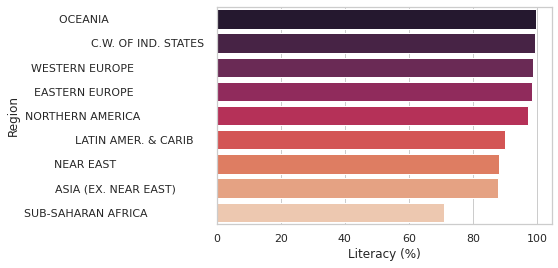

In [121]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.barplot(x = literacyByRegion['Literacy (%)'], y = literacyByRegion['Region'], palette='rocket')

In [122]:
#Lista dos 5 países com maior quantidade de celulares por 1000 habitantes
ctrs = ctrs.sort_values('Phones (per 1000)', ascending = False)
ctrs.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
45,unitedstates,NORTHERN AMERICA,298444215.0,9631420.0,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,14.14,8.26,0.010,0.204,0.787
38,sweden,WESTERN EUROPE,9016596.0,449964.0,20.0,0.72,1.67,2.77,26800.0,99.0,715.0,6.54,0.01,93.45,10.27,10.31,0.011,0.282,0.707
39,switzerland,WESTERN EUROPE,7523934.0,41290.0,182.2,0.00,4.05,4.39,32700.0,99.0,680.9,10.42,0.61,88.97,9.71,8.49,0.015,0.340,0.645
15,germany,WESTERN EUROPE,82422299.0,357021.0,230.9,0.67,2.18,4.16,27600.0,99.0,667.9,33.85,0.59,65.56,8.25,10.62,0.009,0.296,0.695
10,denmark,WESTERN EUROPE,5450661.0,43094.0,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,54.02,0.19,45.79,11.13,10.36,0.018,0.246,0.735


In [123]:
#Importação do dataset human_freedom
hmFrd = pd.read_excel("human_freedom.xlsx")
hmFrd.head()

,year,ISO_code,countries,region,hf_score,hf_rank,pf_score,pf_rank,ef_score,ef_rank,pf_ss_homicide,womens_freedom
0,2018.0,AUS,australia,Oceania,8.68,5.0,9.12,10.0,8.23,5.0,9.6,10.0
1,2017.0,AUS,australia,Oceania,8.66,6.0,9.13,11.0,8.18,7.0,9.7,10.0
2,2016.0,AUS,australia,Oceania,8.63,6.0,9.10,11.0,8.16,8.0,9.6,10.0
3,2015.0,AUS,australia,Oceania,8.62,6.0,9.13,11.0,8.10,11.0,9.6,10.0
4,2014.0,AUS,australia,Oceania,8.69,6.0,9.26,8.0,8.11,10.0,9.6,10.0


In [124]:
#Dados da tabela de felicidade humana somente do ano de 2018
hmFrd2018 = hmFrd[hmFrd['year'] == 2018.0]
hmFrd2018.head()

,year,ISO_code,countries,region,hf_score,hf_rank,pf_score,pf_rank,ef_score,ef_rank,pf_ss_homicide,womens_freedom
0,2018.0,AUS,australia,Oceania,8.68,5.0,9.12,10.0,8.23,5.0,9.6,10.0
11,2018.0,AUT,austria,Western Europe,8.45,15.0,9.09,15.0,7.80,26.0,9.6,10.0
22,2018.0,BLR,belarus,Eastern Europe,6.67,99.0,6.99,85.0,6.35,114.0,9.0,10.0
33,2018.0,BEL,belgium,Western Europe,8.28,25.0,8.99,17.0,7.56,49.0,9.3,10.0
44,2018.0,BRA,brazil,Latin America & the Caribbean,6.83,88.0,7.10,78.0,6.56,105.0,0.0,10.0


In [125]:
hmFrd[hmFrd['countries'] == 'brazil']

,year,ISO_code,countries,region,hf_score,hf_rank,pf_score,pf_rank,ef_score,ef_rank,pf_ss_homicide,womens_freedom
44,2018.0,BRA,brazil,Latin America & the Caribbean,6.83,88.0,7.10,78.0,6.56,105.0,0.0,10.00
45,2017.0,BRA,brazil,Latin America & the Caribbean,6.89,81.0,7.23,72.0,6.54,106.0,0.0,10.00
46,2016.0,BRA,brazil,Latin America & the Caribbean,6.68,98.0,6.91,87.0,6.45,108.0,0.0,8.50
47,2015.0,BRA,brazil,Latin America & the Caribbean,6.68,98.0,7.15,75.0,6.20,121.0,0.0,8.50
48,2014.0,BRA,brazil,Latin America & the Caribbean,6.93,79.0,7.46,65.0,6.40,113.0,0.0,8.50
49,2013.0,BRA,brazil,Latin America & the Caribbean,6.99,78.0,7.48,62.0,6.50,109.0,0.0,8.50
50,2012.0,BRA,brazil,Latin America & the Caribbean,7.12,68.0,7.61,60.0,6.63,95.0,0.0,9.26
51,2011.0,BRA,brazil,Latin America & the Caribbean,7.21,65.0,7.74,58.0,6.68,92.0,0.3,9.26
52,2010.0,BRA,brazil,Latin America & the Caribbean,7.34,60.0,8.01,51.0,6.66,93.0,1.2,10.00
53,2009.0,BRA,brazil,Latin America & the Caribbean,7.24,62.0,7.99,51.0,6.49,93.0,0.9,10.00


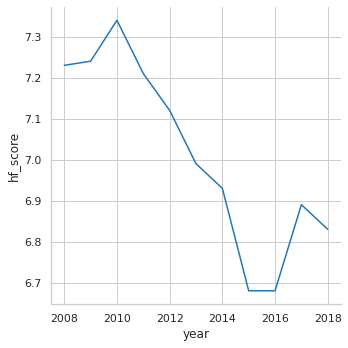

In [126]:
sns.relplot( data=hmFrd[hmFrd['countries'] == 'brazil'], kind='line', x='year', y='hf_score')

In [127]:
#Média populacional por região
#Assim como no caso da alfabetização, é criado um novo Data frame contendo apenas os dados necessários nesse caso a população e a região
populationByRegion = ctrs[['Region', 'Population']].copy()
#Utiliza-se o comando groupby para agrupar os dados por região
populationByRegion = populationByRegion.groupby(['Region']).mean().sort_values("Population", ascending=False)
#Utiliza-se o reset_index para normalizar ocabeçalho do dataframe resultante do comando acima
populationByRegion.reset_index(inplace=True)
populationByRegion

,Region,Population
0,ASIA (EX. NEAR EAST),4.824578e+08
1,NORTHERN AMERICA,1.657716e+08
2,LATIN AMER. & CARIB,5.752857e+07
3,C.W. OF IND. STATES,5.113971e+07
4,SUB-SAHARAN AFRICA,4.546730e+07
5,WESTERN EUROPE,2.706105e+07
6,NEAR EAST,2.588381e+07
7,EASTERN EUROPE,1.304301e+07
8,OCEANIA,1.217011e+07


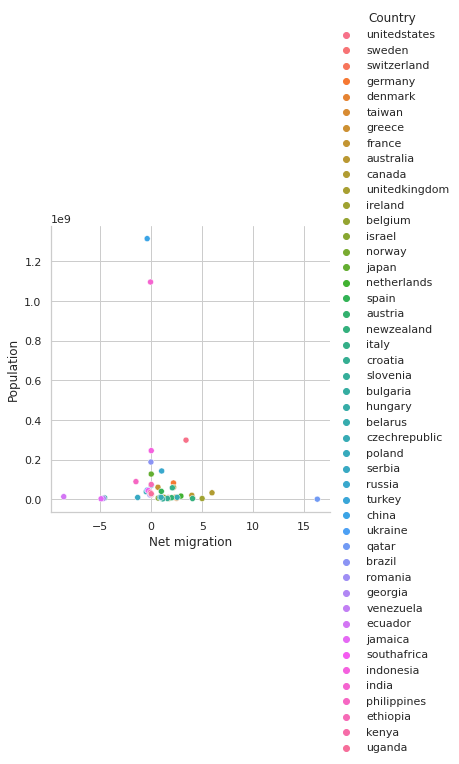

In [128]:
#Relação entre tamanho da população e fluxo migratório
sns.relplot(data=ctrs,x = 'Net migration', y = 'Population', hue = 'Country')

In [132]:
#Ranking de medalhas utilizando a quantidade de medalhas de bronze como principal classificante:
medOlTemp = medOl.copy()
medOlTemp.rename(columns={"Bronze Medal" : "Gold Medal", "Gold Medal" : "Bronze Medal"})
medOlTemp.sort_values(["Gold Medal", "Silver Medal", "Bronze Medal"], ascending = False)
medOlTemp.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total medals
0,unitedstates,39.0,41.0,33.0,113.0
1,china,38.0,32.0,18.0,88.0
2,japan,27.0,14.0,17.0,58.0
3,unitedkingdom,22.0,21.0,22.0,65.0
4,russia,20.0,28.0,23.0,71.0


In [130]:
hpns = pd.read_excel("hapiness_report.xlsx")